# Wine Quality Data Exploration and Visualization

In [227]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set plot styles for better visualization
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

## Task 1: Load and Clean the Data

### 1: Load wine data

In [231]:
print("Loading wine quality datasets...")

# File paths for the wine quality datasets
dataset_redwine = 'Dataset/winequality-red.xlsx'
dataset_whitewine = 'Dataset/winequality-white.xlsx'

# Function to load the Excel files
def load_xlsx_to_dataframe(file_path):
    df = pd.read_excel(file_path, header=1)
    return df

# Load datasets
df_redwine = load_xlsx_to_dataframe(dataset_redwine)
df_whitewine = load_xlsx_to_dataframe(dataset_whitewine)


Loading wine quality datasets...


In [232]:
# Preview the red wine dataset
print("\nRed wine dataset preview:")
display(df_redwine.head())
print(f"\nRed wine dataset shape: {df_redwine.shape} (rows, columns)")
print(f"Total number of samples: {df_redwine.shape[0]}")
print(f"Total number of features: {df_redwine.shape[1]}")


Red wine dataset preview:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5



Red wine dataset shape: (1599, 12) (rows, columns)
Total number of samples: 1599
Total number of features: 12


In [235]:
# Preview the white wine dataset  
print("\nWhite wine dataset preview:")
display(df_whitewine.head())
print(f"\nWhite wine dataset shape: {df_whitewine.shape} (rows, columns)")
print(f"Total number of samples: {df_whitewine.shape[0]}")
print(f"Total number of features: {df_whitewine.shape[1]}")


White wine dataset preview:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6



White wine dataset shape: (4898, 12) (rows, columns)
Total number of samples: 4898
Total number of features: 12


In [237]:
# Print all the column names of the red wine DataFrame
print("\nRed wine dataset columns:")
display(pd.DataFrame({'Column Names': df_redwine.columns}))


Red wine dataset columns:


,Column Names
0,fixed acidity
1,volatile acidity
2,citric acid
3,residual sugar
4,chlorides
5,free sulfur dioxide
6,total sulfur dioxide
7,density
8,pH
9,sulphates


In [239]:
# Print all the column names of the white wine DataFrame
print("\nWhite wine dataset columns:")
display(pd.DataFrame({'Column Names': df_whitewine.columns}))


White wine dataset columns:


,Column Names
0,fixed acidity
1,volatile acidity
2,citric acid
3,residual sugar
4,chlorides
5,free sulfur dioxide
6,total sulfur dioxide
7,density
8,pH
9,sulphates


In [241]:
# Find total number of rows in both datasets
print("\nRed wine dataset index range:")
print(df_redwine.index)
print("\nWhite wine dataset index range:")
print(df_whitewine.index)



Red wine dataset index range:
RangeIndex(start=0, stop=1599, step=1)

White wine dataset index range:
RangeIndex(start=0, stop=4898, step=1)


In [243]:
# A summary of the numerical columns in both DataFrames
print("\nStatistical summary of the red wine dataset:")
display(df_redwine.describe())

print("\nStatistical summary of the white wine dataset:")
display(df_whitewine.describe())


Statistical summary of the red wine dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000



Statistical summary of the white wine dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [245]:
# See the datatype of each column for both datasets
print("\nRed wine dataset data types:")
display(pd.DataFrame({'Column': df_redwine.dtypes.index, 'Data Type': df_redwine.dtypes.values}))
print("\nWhite wine dataset data types:")
display(pd.DataFrame({'Column': df_whitewine.dtypes.index, 'Data Type': df_whitewine.dtypes.values}))


Red wine dataset data types:


,Column,Data Type
0,fixed acidity,float64
1,volatile acidity,float64
2,citric acid,float64
3,residual sugar,float64
4,chlorides,float64
5,free sulfur dioxide,float64
6,total sulfur dioxide,float64
7,density,float64
8,pH,float64
9,sulphates,float64



White wine dataset data types:


,Column,Data Type
0,fixed acidity,float64
1,volatile acidity,float64
2,citric acid,float64
3,residual sugar,float64
4,chlorides,float64
5,free sulfur dioxide,float64
6,total sulfur dioxide,float64
7,density,float64
8,pH,float64
9,sulphates,float64


### 2: Clean the data

In [248]:
# Check for missing values in red wine dataset
print("\nChecking for missing values in red wine dataset:")
red_missing = df_redwine.isnull().sum()
display(pd.DataFrame({'Column': red_missing.index, 'Missing Values': red_missing.values}))

# Check for missing values in white wine dataset
print("\nChecking for missing values in white wine dataset:")
white_missing = df_whitewine.isnull().sum()
display(pd.DataFrame({'Column': white_missing.index, 'Missing Values': white_missing.values}))


Checking for missing values in red wine dataset:


,Column,Missing Values
0,fixed acidity,0
1,volatile acidity,0
2,citric acid,0
3,residual sugar,0
4,chlorides,0
5,free sulfur dioxide,0
6,total sulfur dioxide,0
7,density,0
8,pH,0
9,sulphates,0



Checking for missing values in white wine dataset:


,Column,Missing Values
0,fixed acidity,0
1,volatile acidity,0
2,citric acid,0
3,residual sugar,0
4,chlorides,0
5,free sulfur dioxide,0
6,total sulfur dioxide,0
7,density,0
8,pH,0
9,sulphates,0


**Conclusion about missing values:**  
Above result shows that there are no missing values or missing numbers in either dataset. If we had any missing values/numbers or n/a we would have used one of these methods:

- `dropna()`: which removes all the rows with missing details
- mean imputation: where you can impute missing data using the functions `mean()` and `fillna()`.

In [251]:
# Check for duplicates

print("Checking for duplicates in red wine dataset:")
red_duplicates = df_redwine.duplicated().sum()
print(f"Total number of duplicated rows in red wine dataset: {red_duplicates}")

print("\nChecking for duplicates in white wine dataset:")
white_duplicates = df_whitewine.duplicated().sum()
print(f"Total number of duplicated rows in white wine dataset: {white_duplicates}")


Checking for duplicates in red wine dataset:
Total number of duplicated rows in red wine dataset: 240

Checking for duplicates in white wine dataset:
Total number of duplicated rows in white wine dataset: 937


**Oberservation about duplicates values:**  
We have identified significant numbers of duplicates in both datasets: 240 duplicated rows in the red wine dataset and 937 duplicated rows in the white wine dataset. This high number of duplicates suggests potential issues with the data collection or recording process. To understand better if these are exact duplicates or just very similar values, we will check for "near-duplicates" by rounding to fewer decimal places and also check for high-precision duplicates.

In [254]:
# Round to fewer decimal places to check for "near-duplicates"
print("\nChecking for near-duplicates by rounding to fewer decimal places:")

# Function to round a dataframe to a specific number of decimal places
def round_dataframe(df, decimal_places=2):
    # Only round numeric columns
    numeric_cols = df.select_dtypes(include=['float64', 'float32']).columns
    df_rounded = df.copy()
    for col in numeric_cols:
        df_rounded[col] = df_rounded[col].round(decimal_places)
    return df_rounded

# Check for duplicates after rounding to 2 decimal places
df_redwine_rounded = round_dataframe(df_redwine, decimal_places=2)
red_duplicates_rounded = df_redwine_rounded.duplicated().sum()
print(f"Red wine duplicates after rounding to 2 decimal places: {red_duplicates_rounded}")

df_whitewine_rounded = round_dataframe(df_whitewine, decimal_places=2)
white_duplicates_rounded = df_whitewine_rounded.duplicated().sum()
print(f"White wine duplicates after rounding to 2 decimal places: {white_duplicates_rounded}")


Checking for near-duplicates by rounding to fewer decimal places:
Red wine duplicates after rounding to 2 decimal places: 240
White wine duplicates after rounding to 2 decimal places: 937


In [256]:
# Now the other direction - check for duplicates with more precision
print("\nChecking for strict duplicates with full precision:")

# For this, we'll ensure we're using the full precision stored in the dataframe
# First, convert all float columns to strings with high precision
def convert_to_high_precision(df, precision=10):
    df_high_precision = df.copy()
    numeric_cols = df.select_dtypes(include=['float64', 'float32']).columns
    for col in numeric_cols:
        df_high_precision[col] = df_high_precision[col].apply(lambda x: format(x, f'.{precision}f'))
    return df_high_precision

# Check for duplicates with higher precision
df_redwine_precise = convert_to_high_precision(df_redwine, precision=10)
red_duplicates_precise = df_redwine_precise.duplicated().sum()
print(f"Red wine duplicates with high precision (10 decimal places): {red_duplicates_precise}")

df_whitewine_precise = convert_to_high_precision(df_whitewine, precision=10)
white_duplicates_precise = df_whitewine_precise.duplicated().sum()
print(f"White wine duplicates with high precision (10 decimal places): {white_duplicates_precise}")


Checking for strict duplicates with full precision:
Red wine duplicates with high precision (10 decimal places): 240
White wine duplicates with high precision (10 decimal places): 937


**Conclusion about duplicate:**

After checking for duplicates at various precision levels (standard, rounded to fewer decimals, and high precision), we found that the number of detected duplicates remained the same across all precision levels. This indicates that the duplicates are exact matches rather than just very similar values. Since there was no difference between standard duplicate detection and more complex approaches, we will proceed with the standard duplicate removal method for simplicity. 


In [259]:
# Create cleaned datasets with duplicates removed
df_redwine_cleaned = df_redwine.drop_duplicates().reset_index(drop=True)
df_whitewine_cleaned = df_whitewine.drop_duplicates().reset_index(drop=True)

print(f"\nRed wine dataset shape after removing duplicates: {df_redwine_cleaned.shape}")
print(f"White wine dataset shape after removing duplicates: {df_whitewine_cleaned.shape}")
print(f"Removed {df_redwine.shape[0] - df_redwine_cleaned.shape[0]} duplicate rows from red wine dataset")
print(f"Removed {df_whitewine.shape[0] - df_whitewine_cleaned.shape[0]} duplicate rows from white wine dataset")


Red wine dataset shape after removing duplicates: (1359, 12)
White wine dataset shape after removing duplicates: (3961, 12)
Removed 240 duplicate rows from red wine dataset
Removed 937 duplicate rows from white wine dataset


The cleaned datasets have 1,359 red wine samples (down from 1,599) and 3,961 white wine samples (down from 4,898).

#### Check for outliers in the cleaned dataset ####

In [263]:
# Check for outliers in red wine dataset using IQR method
print("\nChecking for outliers in red wine dataset...")
for column in ['fixed acidity', 'volatile acidity', 'residual sugar', 'alcohol']:
    Q1 = df_redwine_cleaned[column].quantile(0.25)
    Q3 = df_redwine_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_redwine_cleaned[(df_redwine_cleaned[column] < lower_bound) | (df_redwine_cleaned[column] > upper_bound)]
    print(f"  {column}: {len(outliers)} outliers detected")


Checking for outliers in red wine dataset...
  fixed acidity: 41 outliers detected
  volatile acidity: 19 outliers detected
  residual sugar: 126 outliers detected
  alcohol: 12 outliers detected


In [265]:
# Check for outliers in white wine dataset using IQR method
print("\nChecking for outliers in white wine dataset...")
for column in ['fixed acidity', 'volatile acidity', 'residual sugar', 'alcohol']:
    Q1 = df_whitewine_cleaned[column].quantile(0.25)
    Q3 = df_whitewine_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_whitewine_cleaned[(df_whitewine_cleaned[column] < lower_bound) | (df_whitewine_cleaned[column] > upper_bound)]
    print(f"  {column}: {len(outliers)} outliers detected")



Checking for outliers in white wine dataset...
  fixed acidity: 106 outliers detected
  volatile acidity: 133 outliers detected
  residual sugar: 16 outliers detected
  alcohol: 0 outliers detected


**Conclusion about Outliers:**
- Both datasets include outliers across several variables:
  - Red wine shows noticeable outliers in residual sugar (126 cases) and fixed acidity (41 cases).
  - White wine has quite a few outliers in volatile acidity (133 cases) and fixed acidity (106 cases).
- The way outliers appear also varies between the two wine types:
  - Red wine has many more outliers in sugar levels (126) compared to white wine (just 16).
  - On the other hand, white wine has more outliers in volatile acidity (133).
- These outliers likely reflect some unique characteristics of the wines themselves, rather than mistakes in the data.


- **Decision:** We will keep these outliers for several reasons:
  1. They may be valid measurements of unusual but real wines
  2. They could be important for understanding what affects quality
  3. Extreme values might be particularly associated with very high or low quality ratings
  4. Removing them could eliminate interesting patterns in the data
- In subsequent analyses, we'll be mindful of their potential impact on our results

### 3: Aggregation

In [269]:
# Add wine_type column to each dataset to maintain wine identity
print("Adding wine type identifier to each dataset...")
df_redwine_cleaned['wine_type'] = 'red'
df_whitewine_cleaned['wine_type'] = 'white'

# Combine the datasets into one while preserving the wine type identity
df_combined = pd.concat([df_redwine_cleaned, df_whitewine_cleaned], ignore_index=True)

# Verify that the combined dataset has the right number of samples
print(f"\nCombined dataset shape: {df_combined.shape}")
print(f"Total samples: {df_combined.shape[0]}")
print(f"Number of features: {df_combined.shape[1]} (including wine_type)")

# Count samples by wine type to verify correct aggregation
wine_type_counts = df_combined['wine_type'].value_counts()
print("\nSamples by wine type in the aggregated dataset:")
print(f"Red wine samples: {wine_type_counts['red']}")
print(f"White wine samples: {wine_type_counts['white']}")

# Display the first and last few rows of the combined dataset to verify structure
print("\nFirst and last few rows of the combined dataset with wine type identifier:")
display(df_combined.head(),df_combined.tail(),)

# Display summary statistics of the combined dataset
print("\nSummary statistics of the combined dataset (all wine types):")
display(df_combined.describe())

Adding wine type identifier to each dataset...

Combined dataset shape: (5320, 13)
Total samples: 5320
Number of features: 13 (including wine_type)

Samples by wine type in the aggregated dataset:
Red wine samples: 1359
White wine samples: 3961

First and last few rows of the combined dataset with wine type identifier:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
5319,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white



Summary statistics of the combined dataset (all wine types):


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [271]:
# Save the combined dataset to a CSV file for later use
df_combined.to_csv('combined_wine_data_cleaned.csv', index=False)
print("\nCombined dataset saved to 'combined_wine_data_cleaned.csv'")


Combined dataset saved to 'combined_wine_data_cleaned.csv'


**Data Aggregation Summary**

- Process: Added 'wine_type' variable to each dataset, combined red wine (1359 samples) and white wine (3961 samples) via concatenation
- Structure: Combined dataset has 5320 total samples with wine identity preserved (1359 red, 3961 white)
- Benefits: Enables comparisons between wine types, unified modeling, and analysis of common patterns

## Task 2: Explore the Data

### 4: Identify dependent and independent variables

In [276]:
# All variables in the combined dataset
print("All variables in the combined dataset:")
for col in df_combined.columns:
    print(f"- {col}")

# Identify the dependent variable (target)
target_variable = 'quality'
print(f"\nDependent variable (target): {target_variable}")

# Check the distribution of wine quality scores
print("\nDistribution of wine quality ratings:")
quality_counts = df_combined[dependent_variable].value_counts().sort_index()
print(quality_counts)


# Identify the independent variables 
independent_variables = [col for col in df_combined.columns if col not in [target_variable, 'wine_type']]
print("\nIndependent variables (features):")
for feature in independent_variables:
    print(f"- {feature}")

All variables in the combined dataset:
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol
- quality
- wine_type

Dependent variable (target): quality

Distribution of wine quality ratings:
quality
3      30
4     206
5    1752
6    2323
7     856
8     148
9       5
Name: count, dtype: int64

Independent variables (features):
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol


#### Conclusion: Dependent and Independent Variables

In our analysis of the wine dataset:

##### 1. **Dependent Variable – Wine Quality**
- The main variable we’re trying to understand or predict is `quality`.
- It’s a score (ranging from 3-9) given by wine experts, reflecting how good the wine is.

##### 2. **Independent Variables – Chemical Properties**
- There are 11 measurable features, such as `alcohol`, `fixed acidity`, and `citric acid`.
- These act as our predictors — things that might affect the wine's quality.

### 5: Transform the categorical data into numeric

In [280]:
# Create a copy of the dataframe for encoding
df_encoded = df_combined.copy()

# Assign wine_type to category-datatype
df_encoded['wine_type'] = df_encoded['wine_type'].astype('category')

# Check the datatypes
print(df_encoded.dtypes)

# Identify columns with category-datatype
cat_colums = df_encoded.select_dtypes(include=['category']).columns

# Create a code for each categorical column
df_encoded['wine_type_cat'] = df_encoded['wine_type'].cat.codes

# Check how codes are assigned
print("\nCategory codes for wine_type:")
for category, code in enumerate(df_encoded['wine_type'].cat.categories):
    print(f"{code} -> {category}")

# Remove the original wine_type column
df_encoded_new = df_encoded.drop('wine_type', axis=1)

# Rename wine_type_cat to wine_type
df_encoded_new = df_encoded_new.rename(columns={'wine_type_cat': 'wine_type'})

# Display the result
print("\nDateframe after encoding and renamning")
display(df_encoded_new.head())

fixed acidity            float64
volatile acidity         float64
citric acid              float64
residual sugar           float64
chlorides                float64
free sulfur dioxide      float64
total sulfur dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                    int64
wine_type               category
dtype: object

Category codes for wine_type:
red -> 0
white -> 1

Dateframe after encoding and renamning


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0


#### Conclusion: Categorical Data Transformation

We converted the `wine_type` column (red/white) into numeric values using **label encoding**:

- **Red wine → 0**, **White wine → 1**
- This simple method works well because there are only two categories.

##### Why it matters:
- Many models require numeric inputs — encoding lets us include categorical data without losing meaning.
- Now we can analyze red vs. white wines using statistical methods and machine learning.

*For variables with more than two categories, one-hot encoding would be more appropriate.*


### 6: Calculate the descriptive statistics of the numeric data and check normality

In [284]:
print("\nDescriptive statistics for numeric data:")
numeric_cols = df_encoded_new.describe()
display(numeric_cols)


Descriptive statistics for numeric data:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677,0.744549
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772,0.436155
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000,1.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [315]:
def check_normality(df):
    """
    Tests whether numeric columns follow a normal distribution.
    Uses D’Agostino and Jarque-Bera tests. 
    """
    num_cols = [col for col in df.select_dtypes(include=['float64', 'int64']).columns 
                if col != 'wine_type']
    
    rows = []

    for col in num_cols:
        data = df[col]
        skewness = data.skew()
        kurtosis = data.kurt()
        dagostino = stats.normaltest(data)
        jb = stats.jarque_bera(data)

        normal = "No"
        if dagostino.pvalue > 0.05 and jb.pvalue > 0.05 and abs(skewness) < 1:
            normal = "Yes"
        elif dagostino.pvalue > 0.01 and abs(skewness) < 2:
            normal = "Partial"

        rows.append({
    'Column': col,
    'Skewness': round(skewness, 3),
    'Kurtosis': round(kurtosis, 3),
    "D'Agostino p-value": f"{dagostino.pvalue:.2e}",
    "Jarque-Bera p-value": f"{jb.pvalue:.2e}",
    'Normally Distributed?': normal
})

    
    return pd.DataFrame(rows)


check_normality(df_encoded_new)

,Column,Skewness,Kurtosis,D'Agostino p-value,Jarque-Bera p-value,Normally Distributed?
0,fixed acidity,1.650,4.589,0.00e+00,0.00e+00,No
1,volatile acidity,1.505,2.863,0.00e+00,0.00e+00,No
2,citric acid,0.484,2.582,1.65e-112,0.00e+00,No
3,residual sugar,1.707,7.026,0.00e+00,0.00e+00,No
4,chlorides,5.338,48.261,0.00e+00,0.00e+00,No
5,free sulfur dioxide,1.363,9.521,0.00e+00,0.00e+00,No
6,total sulfur dioxide,0.064,-0.300,1.68e-07,7.33e-06,No
7,density,0.666,8.711,1.68e-259,0.00e+00,No
8,pH,0.390,0.432,2.44e-34,6.68e-39,No
9,sulphates,1.809,8.613,0.00e+00,0.00e+00,No


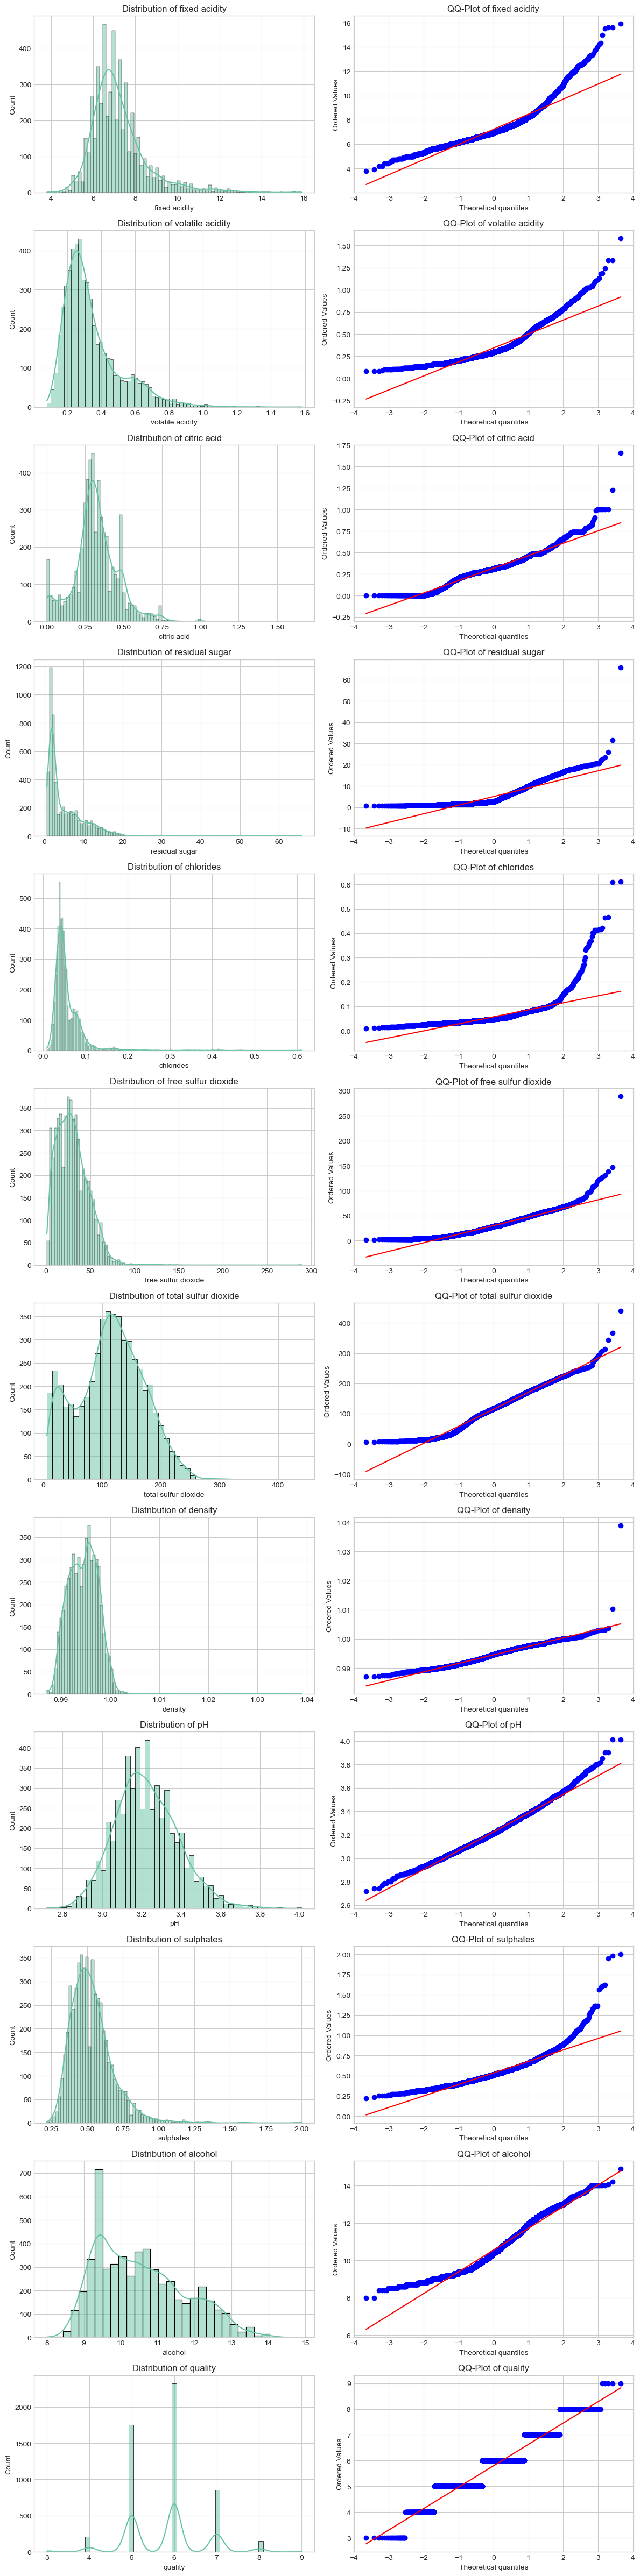

In [317]:
def visualize_distributions(df):
    """
    Visualizes the distribution of all numeric columns with histogram and QQ-plot.
    """
    num_cols = [col for col in df.select_dtypes(include=['float64', 'int64']).columns 
                if col != 'wine_type']
    
    fig, axes = plt.subplots(len(num_cols), 2, figsize=(12, 4 * len(num_cols)))

    for i, col in enumerate(num_cols):
        ax1 = axes[i, 0] if len(num_cols) > 1 else axes[0]
        ax2 = axes[i, 1] if len(num_cols) > 1 else axes[1]

        sns.histplot(df[col], kde=True, ax=ax1)
        ax1.set_title(f'Distribution of {col}')

        stats.probplot(df[col], dist="norm", plot=ax2)
        ax2.set_title(f'QQ-Plot of {col}')

    plt.tight_layout()
    plt.show()

visualize_distributions(df_encoded_new)

In [319]:
#### Conclusion:

None of the numeric variables are normally distributed (p < 0.01).
Some, like residual sugar and chlorides, are highly right-skewed.
Even moderately skewed variables, like alcohol, fail the tests—likely due to the large sample size.
This suggests normality-based methods may not be appropriate without transformation

SyntaxError: invalid character '—' (U+2014) (1675957142.py, line 5)